<a href="https://colab.research.google.com/github/MarkoArsenovic/PPPO2021/blob/main/Vezbe10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vežbe 10** Detekcija objekata na fotografijama II

## Sadržaj

1. Uvod
2. Višestruko praćenje objekata pomoću OpenCV
3. Detekcija teksta na fotografijama pomoću *Tesseract*
4. Detekcija lica pomoću *Viola Jones/Haar-like* i *Adaboost Cascade*
5. Detekcija lica pomoću HOG karakteristika






### Uvod

Detekcija objekata je zadatak obrade fotografije/kompjuterske vizije koji otkriva (semantičke) instance objekata koje odgovaraju datom tipu (npr. lica, ljudi, vozila i zgrade) na fotografijama. 

Predstavićemo primenu nekoliko najsavremenijih tehnika detekcije objekata. 

Sledeći zadaci obrade fotografija međusobno su povezani (iako se odnose na različite zadatke): klasifikacija fotografija, lokalizacija objekata i detekcija objekata. 

Klasifikacija fotografija ima za cilj da predvidi oznaku klase za fotografiju, dok se lokalizacija objekta bavi identifikovanjem lokacija i crtanjem graničnih okvira oko objekta na fotografiji. 

Detekcija objekata kombinuje ova dva zadatka (klasifikacija + lokalizacija) - crta granični okvir oko svakog objekta (može biti više objekata) od interesa na fotografiji i svakom od njih dodeljuje oznaku klase. Svi ovi problemi su zajednički poznati kao prepoznavanje objekata. 

Prikaz razlike između ovih tehnika:


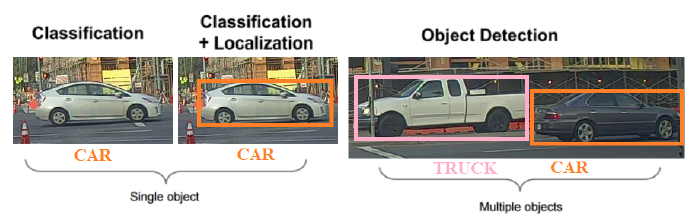

Učitavanje dataseta potrebnog za ove vežbe
- učitati images.zip
- učitati models.zip

In [16]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xytD9qBNugjASJZsjC_Laftqc6VxPRPi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xytD9qBNugjASJZsjC_Laftqc6VxPRPi" -O images.zip && rm -rf /tmp/cookies.txt

--2021-05-08 12:15:20--  https://docs.google.com/uc?export=download&confirm=s991&id=1xytD9qBNugjASJZsjC_Laftqc6VxPRPi
Resolving docs.google.com (docs.google.com)... 142.250.99.138, 142.250.99.139, 142.250.99.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7g-docs.googleusercontent.com/docs/securesc/r0d9l4dq6f83fuek4nhufm1l1jdeoc64/1ju22llt9ne6u57gl78gov259inhsho5/1620476100000/07050430151874469418/11183613588926957309Z/1xytD9qBNugjASJZsjC_Laftqc6VxPRPi?e=download [following]
--2021-05-08 12:15:20--  https://doc-00-7g-docs.googleusercontent.com/docs/securesc/r0d9l4dq6f83fuek4nhufm1l1jdeoc64/1ju22llt9ne6u57gl78gov259inhsho5/1620476100000/07050430151874469418/11183613588926957309Z/1xytD9qBNugjASJZsjC_Laftqc6VxPRPi?e=download
Resolving doc-00-7g-docs.googleusercontent.com (doc-00-7g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [17]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw" -O models.zip && rm -rf /tmp/cookies.txt

--2021-05-08 12:15:25--  https://docs.google.com/uc?export=download&confirm=XRbu&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw
Resolving docs.google.com (docs.google.com)... 142.250.99.138, 142.250.99.139, 142.250.99.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2g-docs.googleusercontent.com/docs/securesc/ee9fvui79l08kvi08pk75m56738a7ulk/7lu358uj860n6t15o88fe2tjdu1agn38/1620476100000/07050430151874469418/17802177545035825587Z/1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw?e=download [following]
--2021-05-08 12:15:25--  https://doc-04-2g-docs.googleusercontent.com/docs/securesc/ee9fvui79l08kvi08pk75m56738a7ulk/7lu358uj860n6t15o88fe2tjdu1agn38/1620476100000/07050430151874469418/17802177545035825587Z/1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw?e=download
Resolving doc-04-2g-docs.googleusercontent.com (doc-04-2g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

Unzip dataseta

In [18]:
!unzip images.zip

Archive:  images.zip
replace images/all.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
   creating: models/face_detect/
  inflating: models/face_detect/haarcascade_eye.xml  
  inflating: models/face_detect/haarcascade_frontalface_alt2.xml  
  inflating: models/face_detect/haarcascade_smile.xml  
  inflating: models/face_detect/opencv_face_detector.pbtxt  
  inflating: models/face_detect/opencv_face_detector_uint8.pb  
   creating: models/faster_rcnn/
  inflating: models/faster_rcnn/frozen_inference_graph.pb  
  inflating: models/faster_rcnn/image_info_test2017.json  
   creating: models/mask_rcnn/
  inflating: models/mask_rcnn/colors.txt  
  inflating: models/mask_rcnn/frozen_inference_graph.pb  
  inflating: models/mask_rcnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt  
  inflating: models/mask_rcnn/mscoco_labels.names  
   creating: models/text_detect/
  inflating: models/text_detect/frozen_east_text_detection.pb  
   creating: models/yolov3/
  inflating: models/yolov3/coco_classes.txt  
  inflating: models/yolov3/yolov3.cfg  

### Multiple Object Tracking with opencv-python // Višestruko praćenje objekata pomoću OpenCV


Praćenje objekata je zadatak obrade fotografije/video zapisa koji vremenom locira jedan ili više pokretnih objekata. Cilj zadatka je pronaći vezu između ciljnih objekata u uzastopnim video kadrovima. Zadatak postaje težak kada se objekti kreću brže u odnosu na brzinu kadrova ili kada objekat koji se prati vremenom menja orijentaciju. Sistemi za praćenje objekata koriste model kretanja uzimajući u obzir kako se ciljni objekat može promeniti za različita moguća kretanja objekta. Praćenje objekata je korisno u interakciji čovek-računar, bezbednosti/nadzoru, kontroli saobraćaja i mnogim drugim oblastima. Budući da uzima u obzir izgled i lokaciju objekta u prošlom okviru, pod određenim okolnostima, možda ćemo i dalje moći da pratimo objekat uprkos tome što otkrivanje objekta ne uspe. Nekoliko algoritama za praćenje koji vrše lokalna pretraživanja su vrlo brzi. Stoga je generalno dobra strategija neograničeno praćenje objekta nakon što se prvi put detektuje. Većina realnih aplikacija istovremeno implementira praćenje i otkrivanje.
Naučićemo kako da pratimo više objekata u video zapisu pomoću funkcija modula OpenCV-Python, uz date lokacije objekata u prvom okviru u smislu koordinata graničnog okvira.

- Klasa *MultiTracker* iz OpenCV-a je korišćena za primenu praćenja više objekata. Višestruki objekt za praćenje (koji se primenjuje jednostavno kao kolekcija jednopredmetnih pratilaca) obrađuje praćene objekte nezavisno.

- Višestrukom objektu za praćenje potrebna su dva ulaza, naime, referentni video kadar (koristićemo prvi video kadar kao referencu) i lokacije (koje će biti naznačene u okvirima za ograničavanje) svih objekata (u referentnom okviru) koje želimo da pratimo. Zatim, tragač istovremeno prati lokacije ciljnih objekata u sledećim kadrovima.

- OpenCV ima osam različitih objekata za praćenje (tipove): BOOSTING, MIL, KCF, TLD, MEDIANFLOW, GOTURN, MOSSE i CSRT. KCF *tracker* je brz i tačan, CSRT *tracker* je tačniji od KCF-a, ali sporiji, dok je MOSSE *tracker* izuzetno brz, ali ne tako precizan kao KCF ili CSRT.

Koristićemo CSRT *tracker*; njegova primena se zasniva na diskriminativnom korelacionom filtru sa prostornom pouzdanošću i pouzdanošću kanala.

4.1.2


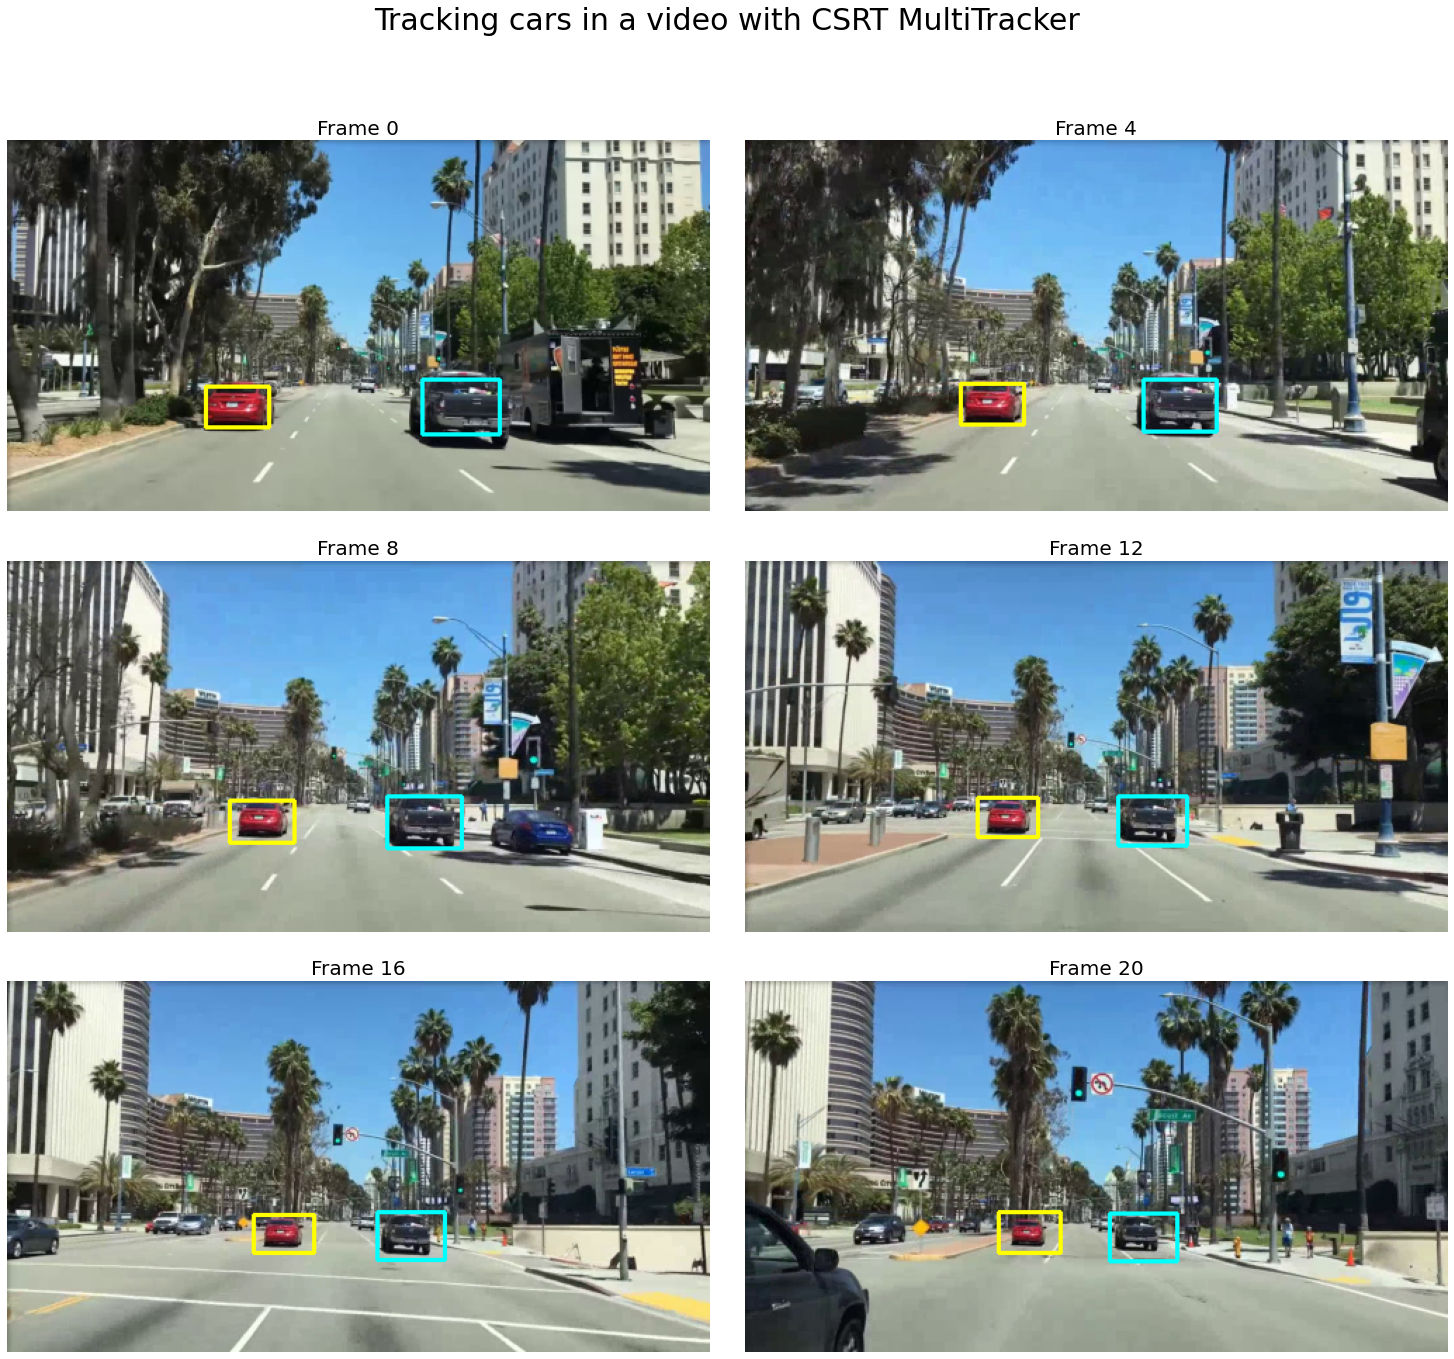

In [19]:
# https://www.youtube.com/watch?v=whXnYIgT4P0
# https://stackoverflow.com/questions/54013403/attribute-error-multitracker-create-not-found-in-cv2-on-raspberry-pi
#print(cv2.getBuildInformation())
#pip uninstall opecv-python 
#pip uninstall opencv-contrib-python
#pip install opencv-python==3.4.4.19
#pip install opencv-contrib-python==3.4.4.19
import time
import cv2
import matplotlib.pylab as plt
from imutils import resize

print(cv2.__version__)
# 3.4.4

# Kreirajte MultiTracker objekat
multi_tracker = cv2.MultiTracker_create()
 
# Inicijalizujemo koordinate graničnog okvira objekta (automobila) koji ćemo pratiti
car_bbox = (141,175,45,29) 
car2_bbox = (295,170,55,39) 
bboxes = [car_bbox, car2_bbox]
colors = [(0, 255, 255), (255, 255, 0)]

"""
Pročitajte prvi kadar ulaznog video zapisa i pokrenite OpenCV Multi-Tracker 
tako što ćete ga inicijalizovati okvirom i isporučenim koordinatama graničnog okvira (da biste pronašli objekte u prvom kadru, za početak)
"""
vs = cv2.VideoCapture('images/road.mp4')
_, frame = vs.read()
frame = resize(frame, width=500)
for bbox in bboxes:
    multi_tracker.add(cv2.TrackerCSRT_create(), frame, bbox)

"""
Iterativno čitajte okvire iz video toka 
(pročitajte 3 kadra u sekundi, na primer, da biste smanjili broj okvira za čitanje), 
sve dok se ne pročitaju svi kadrovi
"""
j = 0
fig = plt.figure(figsize=(20,55))
while True:
    # Uhvatite trenutni kadar, a zatim obradite (ako koristimo VideoStream ili VideoCapture objekat)
    vs.set(cv2.CAP_PROP_POS_MSEC,(j*300))    # added this line - 1 sec 3 frames
    _, frame = vs.read()
    
    # Proverite da li smo stigli do kraja stream-a
    if frame is None or j//4 > 18:
        break 

    # Promenite veličinu okvira (tako da ga možemo brže obraditi) i uhvatite dimenzije okvira. 
    frame = resize(frame, width=500)
    (H, W) = frame.shape[:2]

    # Nabavite ažuriranu lokaciju objekata u narednim okvirima.
    success, boxes = multi_tracker.update(frame)
 
    # Proverite da li je praćenje uspelo i, ako je bilo uspešno, nacrtajte praćene objekte
    if success:
        # Iscrtavanje praćenih objekata
        for i, box in enumerate(boxes):
            p1 = (int(box[0]), int(box[1]))
            p2 = (int(box[0] + box[2]), int(box[1] + box[3]))
            cv2.rectangle(frame, p1, p2, colors[i], 2, 1)

    # Prikaz izlaznog okvira
    if j%4 == 0:
        plt.subplot(9,2,j//4+1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Frame {}'.format(j), size=20)

    j += 1

plt.suptitle('Tracking cars in a video with CSRT MultiTracker', size=30)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
plt.show()

### Text Detection in images with Tesseract // Detekcija teksta na fotografijama pomoću Tesseract


Detekcija teksta odnosi se na zadatak obrade fotografije koji otkriva i lokalizuje koordinate ograničenog okvira tekstova sadržanih na fotografiji. Izdvajanje i razumevanje tekstualnih informacija sadržanih na fotografijama postalo je važno i popularno. Detekcija teksta služi kao zadatak predobrade. Detektovaćemo tekst na fotografiji pomoću prethodno obučenog modela *deep learning*-a (nazvanog EAST), a zatim prepoznati tekst pomoću funkcija biblioteke *pytesseract* i *opencv-python*.

Detektor teksta EAST (*Efficient and Accuracy Scene Text detection*) moćan je alat za tačno i brzo otkrivanje teksta. Model je FCN (pojedinačna duboka neuronska mreža) koji direktno predviđa granična polja za reči/tekstove linija prisutnih na ulaznoj fotografiji (sa proizvoljnim orijentacijama), eliminišući na taj način nepotrebne korake predobrade (kao što su agregacija kandidata i particioniranje reči). Potrebno je primeniti *thresholding* i NMS na predviđene geometrijske oblike kao korake naknadne obrade.

Sledeći dijagram prikazuje EAST detektor:


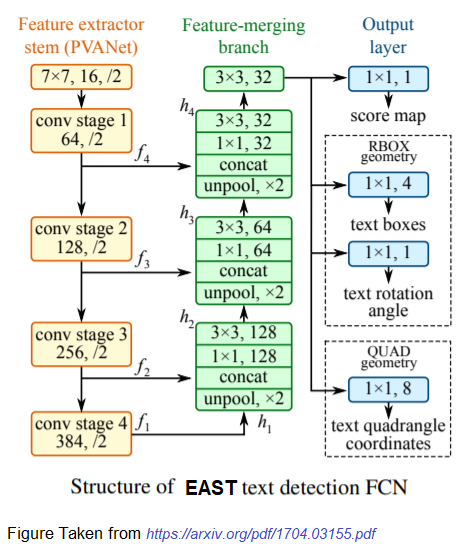

Optičko prepoznavanje znakova (OCR) / prepoznavanje teksta odnosi se na zadatak izdvajanja teksta sa fotografija. Koristićemo *Tesseract* v4 za prepoznavanje teksta. *Tesseract* v4, podrazumevano, koristi mehanizam za prepoznavanje zasnovan na LSTM-u. Modul *pytesseract* samo pruža omot preko alata za komandnu liniju *Tesseract* (argumente komandne linije možemo odrediti argumentom config). Dat je prikaz alata za procese otkrivanja i prepoznavanja teksta:

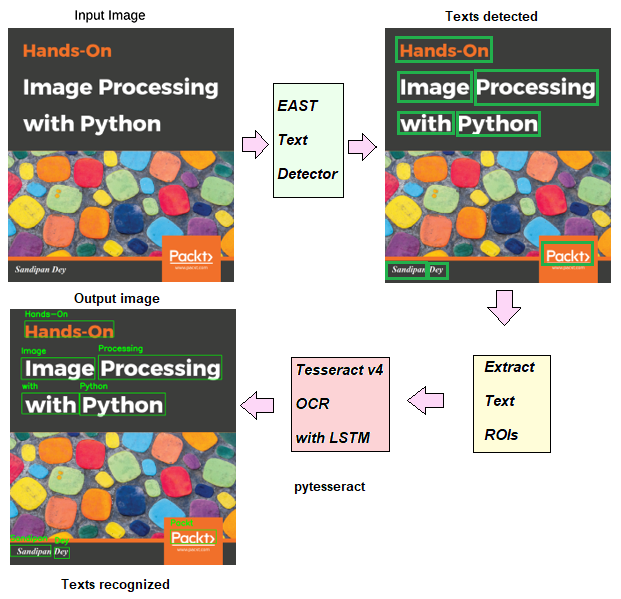

Pokretanje prosleđivanja na prethodno obučenom modelu EAST vraća rezultate i geometriju koji se dekodiraju pomoću funkcije *decode_predictions()* da bi se dobili ograničeni okviri (ROI) za koje se predviđa da sadrže tekst. Tekstovi unutar ovih ROI treba da se izdvoje metodom *image_to_string()*.

Da bi se izvukli tekstovi kao nizovi pomoću *Tesseract* v4 OCR, argumenti komandne linije trebaju se proslediti kao konfiguracija metodi *image_to_string()* (npr. koristili smo "-l eng --oem 1 --psm 11" kao konfiguracija):
- Jezik (engleski, konfiguracija)
- OEM zastava = 1 (koristite LSTM (Long Short-Term Memori) model za OCR)
- OEM vrednost = 11 (tretirajte kao proređen tekst, odnosno pronađite što više teksta bez određenog redosleda)

In [20]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [21]:
!pip install pytesseract

In [22]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [23]:
# https://stackoverflow.com/questions/44619077/pytesseract-ocr-multiple-config-options
# https://codeload.github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/zip/master
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import pytesseract
#import tesseract
import cv2

min_confidence = 0.5

"""
Funkcija za dekodiranje predikcije pomoću EAST-a i 
izdvajanje ograničavajućih okvira (lokacije otkrivenog teksta) i povezanih poverljivosti.
"""
def decode_predictions(scores, geometry):
    """
    Uzmite broj redova i kolona iz obima rezultata, 
    a zatim inicijalizujte naš skup pravougaonika 
    koji ograničavaju okvire i odgovarajuće ocene pouzdanosti
    """
    (num_rows, num_cols) = scores.shape[2:4]
    rects = []
    confidences = []
 
    # Petlja preko broja redova
    for y in range(0, num_rows):
        """
        Izvući rezultate (verovatnoće), praćene geometrijskim podacima 
        koji se koriste za izvođenje potencijalnih koordinata 
        graničnog okvira koji okružuju tekst
        """
        scores_data = scores[0, 0, y]
        x_data0 = geometry[0, 0, y]
        x_data1 = geometry[0, 1, y]
        x_data2 = geometry[0, 2, y]
        x_data3 = geometry[0, 3, y]
        angles_data = geometry[0, 4, y]
 
        # Petlja preko broja kolona
        for x in range(0, num_cols):
            # Ako rezultat nema dovoljnu verovatnoću, zanemarite ga
            if scores_data[x] < min_confidence:
                continue
 
            # Izračunajte offset faktor jer će rezultujuće mape karakteristika biti 4x manje od ulazne fotografije
            (offset_x, offset_y) = (x * 4.0, y * 4.0)
 
            # Izvući ugao rotacije za predviđanje i zatim izračunati sinus i kosinus
            angle = angles_data[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
 
            # Koristite geometrijski volumen za izvođenje širine i visine graničnog okvira
            h = x_data0[x] + x_data2[x]
            w = x_data1[x] + x_data3[x]
 
            # Izračunajte i početnu i završnu (x, y)-koordinatu za okvir za predviđanje teksta
            end_x = int(offset_x + (cos * x_data1[x]) + (sin * x_data2[x]))
            end_y = int(offset_y - (sin * x_data1[x]) + (cos * x_data2[x]))
            start_x = int(end_x - w)
            start_y = int(end_y - h)
 
            # Dodajte koordinate graničnog oktvira i ocenu verovatnoće na naše odgovarajuće liste
            rects.append((start_x, start_y, end_x, end_y))
            confidences.append(scores_data[x])
 
    # Vratiti granične okvire i povezane pouzdanosti
    return (rects, confidences)

# Učitajte ulaznu fotografiju i pribavite dimenzije fotografije
im = 'images/book_cover.png'
image = cv2.imread(im)
orig = image.copy()
(origH, origW) = image.shape[:2]
 
# Postavite novu širinu i visinu (320x320), a zatim odredite odnos u promeni i za širinu i za visinu
width = height = 32*10
(w, h) = (width, height)
rW = origW / float(w)
rH = origH / float(h)
 
# Promenite veličinu fotografije i pribavite nove dimenzije fotografije
image = cv2.resize(image, (w, h))
(H, W) = image.shape[:2]

# Definišite dva imena izlaznih slojeva modela koji nas zanimaju 
# (verovatnoće izlaza i koordinate okvira za ograničavanje otkrivenog teksta)
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]
 
# Učitajte unapred obučeni EAST detektor teksta
print("loading EAST text detector...")
net = cv2.dnn.readNet('models/text_detect/frozen_east_text_detection.pb')

# Konstruisati blob iz fotografije, a zatim izvršiti prosleđivanje modela da bi se dobila dva skupa izlaznih slojeva
b, g, r = np.mean(image[...,0]), np.mean(image[...,1]), np.mean(image[...,2])
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), (b, g, r), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
 
# Dekodirajte predviđanja da biste dobili granična polja otkrivenih tekstova
#  i na kraju koristite potiskivanje bez maksimuma da biste se rešili slabih, preklapajućih graničnih okvira
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

padding = 0.001 #0.01 #0.5
# Inicijalizujte listu rezultata
results = []
 
"""
Za svaku lokaciju (granični okvir) koju otkrije EAST, 
izvucite odgovarajući ROI, 
a zatim pomoću pitessearct izvucite tekst unutar ROI 
"""
# Petlja preko graničnih okvira
for (start_x, start_y, end_x, end_y) in boxes:
    # Skalirajte koordinate graničnog okvira na osnovu odgovarajućih odnosa
    start_x = int(start_x * rW)
    start_y = int(start_y * rH)
    end_x = int(end_x * rW)
    end_y = int(end_y * rH)

    """
    Da bismo dobili bolji OCR teksta, 
    potencijalno možemo primeniti malo "obloga" oko graničnog okvira - 
    ovde izračunavamo delte u x i y smeru
    """
    dX = int((end_x - start_x) * padding)
    dY = int((end_y - start_y) * padding)

    # Nanesite "obloge" na svaku stranu ograničavajućeg okvira
    start_x = max(0, start_x - dX*2)
    start_y = max(0, start_y - dY*2)
    end_x = min(origW, end_x + (dX * 2))
    end_y = min(origH, end_y + (dY * 2))

    # Izdvojite stvarni postavljeni ROI
    roi = orig[start_y:end_y, start_x:end_x]

    """ Primena Tesseract v4
    (1) jezik, 
    (2) OEM zastavicu,
    (3) OEM vrednost
    """
    config = ("-l eng --oem 1 --psm 11")
    text = pytesseract.image_to_string(roi, config=config)
    #print(text)

    # Na listu rezultata dodajte koordinate ograničenja i tekst OCR-a
    results.append(((start_x, start_y, end_x, end_y), text))

    # Sortirajte koordinate okvira za rezultate od vrha do dna
    results = sorted(results, key=lambda r:r[0][1])
 
print(len(results))

# Prelistajte izdvojene tekstove iz ROI-a i nacrtajte ih na odgovarajućim mestima fotografije
output = orig.copy()
i = 1
for ((start_x, start_y, end_x, end_y), text) in results:
    # display the text OCR'd by Tesseract
    #print("OCR TEXT")
    #print("========")
    print(text)

    """
    Izvadite tekst koji nije ASCII, tako da možemo crtati tekst na fotografiji pomoću OpenCV-a, 
    a zatim nacrtati tekst i ograničavajući okvir koji okružuje područje teksta ulazne fotografije
    """
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    cv2.rectangle(output, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
    cv2.putText(output, text, (start_x, start_y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

    # Prikaz izlazne fotografije
    i += 1
cv2.imwrite("images/text_" + im.split('/')[-1], output)

loading EAST text detector...
8
Hands-On

Processing

Image

with

Python

Packt

Sandipan

Dey



True

![](images\text_book_cover.png)

### Face Detection with Viola Jones/Haar-like features and Adaboost Cascade //  Detekcija lica pomoću Viola Jones/Haar-like i Adaboost Cascade

*Haar-like* funkcije su vrlo korisne karakteristike fotografije koje se koriste u detekciji objekata. 

*Viola* i *Jones* su ih uveli u prvi detektor lica u stvarnom vremenu. Korišćenjem integralnih fotografija, Haar-ove karakteristike bilo koje veličine (skale) mogu se efikasno izračunati u konstantnom vremenu.

Brzina računanja je ključna prednost Haar-ove funkcije u odnosu na većinu drugih karakteristika. Korišćenjem *Viola-Jones* algoritma za otkrivanje lica, lica se mogu otkriti na fotografiji pomoću ovih *Haar*-sličnih karakteristika. Svaka *Haar*-ova karakteristika deluje samo kao slabi klasifikator, pa je stoga potreban ogroman broj ovih karakteristika da bi se detektovalo lice sa dobrom tačnošću. Zbog toga se izračunava veliki broj karakteristika za sve moguće lokacije i veličine svakog *Haar*-sličnog jezgra, koristeći integralne fotografije. Zatim se klasifikator ansambla *AdaBoost* koristi za odabir važnih karakteristika iz ogromnog broja svojstava i njihovo kombinovanje u jak model klasifikatora tokom faze treninga. Naučeni model se zatim koristi za klasifikaciju regiona lica sa izabranim karakteristikama i može se koristiti kao detektor lica.

Koristićemo unapred obučene klasifikatore OpenCV (odnosno detektore) za lice i oči kako bismo otkrili ljudska lica na fotografiji. Ovi prethodno obučeni klasifikatori su serializovani kao KSML datoteke i isporučuju se sa OpenCV instalacijom.

Lica na fotografiji mogu se pronaći pomoću funkcije *cv2.detectMultiScale()* sa prethodno obučenim kaskadnim klasifikatorom lica. Ova funkcija prihvata sledeće parametre:

- *scaleFactor*: Ovo je parametar koji određuje u kojoj meri se veličina fotografije smanjuje za svaku skalu fotografije i koristi za stvaranje piramide skale (npr. faktor skale od 1,2 znači smanjenje veličine za 20%). Što je manji parametar *scaleFactor*, to je veća šansa da se pronađe odgovarajuća veličina (za otkrivanje, sa modelom).

- *minNeighbors*: Ovo je parametar koji određuje broj komšija koje svaki pravougaonik kandidat treba da zadrži. Ovaj parametar utiče na kvalitet otkrivenih lica - veća vrednost omogućava otkrivanje sa boljim kvalitetom, ali manjim brojem.

- *minSize* i *maxSize*: Ovo su minimalne i maksimalne moguće veličine objekata. Objekti koji prelaze vrednosti biće zanemareni.

Kada se detektuju lica, funkcija lica vraća položaje lica kao *Rect*(x, y, w, h).

Jednom kada se dobije okvir za ograničavanje lica, on definiše ROI za lice, a zatim se može primeniti detekcija oka/osmeha na ovom ROI (pošto su oči/osmeh uvek na licu).





7


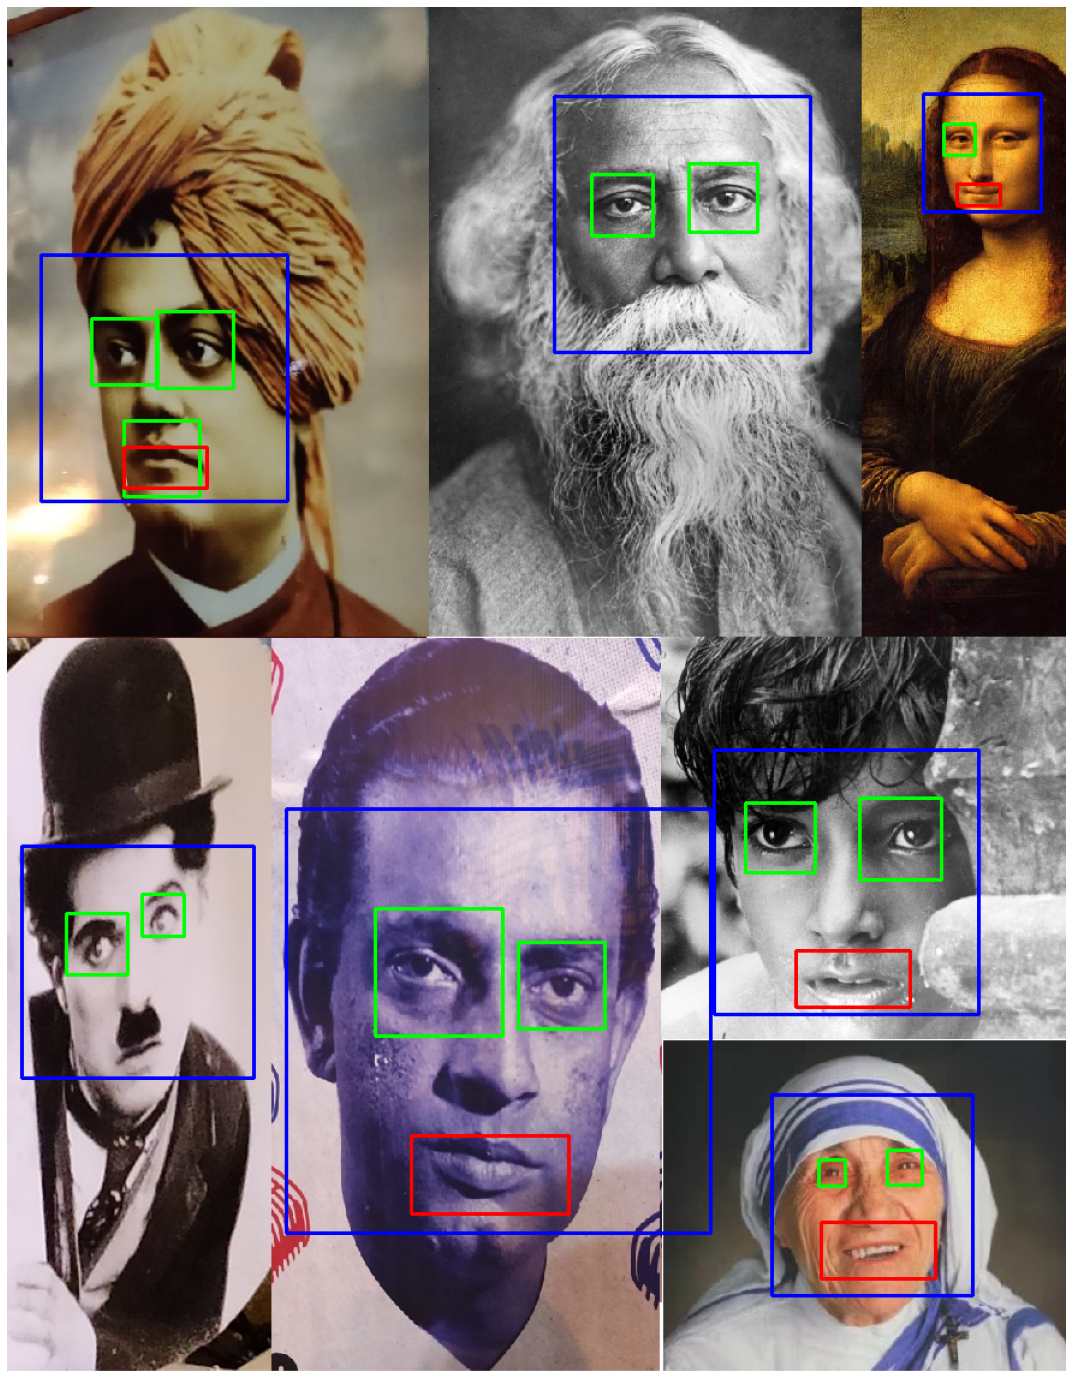

In [24]:
# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_smile.xml
import cv2
import numpy as np
import matplotlib.pylab as plt

# Učitajte prethodno obučene klasifikatore da biste otkrili lice, oči i osmeh iz odgovarajućih xml datoteka
face_cascade = cv2.CascadeClassifier('models/face_detect/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('models/face_detect/haarcascade_eye.xml') # haarcascade_eye_tree_eyeglasses.xml
smile_cascade = cv2.CascadeClassifier('models/face_detect/haarcascade_smile.xml')

# Pročitajte ulaznu fotografiju (koja sadrži 7 lica) i pretvorite je u sive tonove
# Otkrijte lica prisutna na fotografiji pomoću modela kaskadnog klasifikatora lica
img = cv2.imread('images/all.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.01, 8) # scaleFactor=1.2, minNbr=5
print(len(faces)) # broj detektovanih lica = 7

# Unutar svake kutije za ograničavanje lica otkrijte oči i osmeh pomoću odgovarajućih prethodno obučenih modela
# Nacrtajte granična polja koja odgovaraju otkrivenim licima, očima i osmesima 
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    #print(eyes) # lokacija očiju
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)
       
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.tight_layout()
plt.show()

### Face Detection with dlib using HOG features // Detekcija lica pomoću HOG karakteristika

5


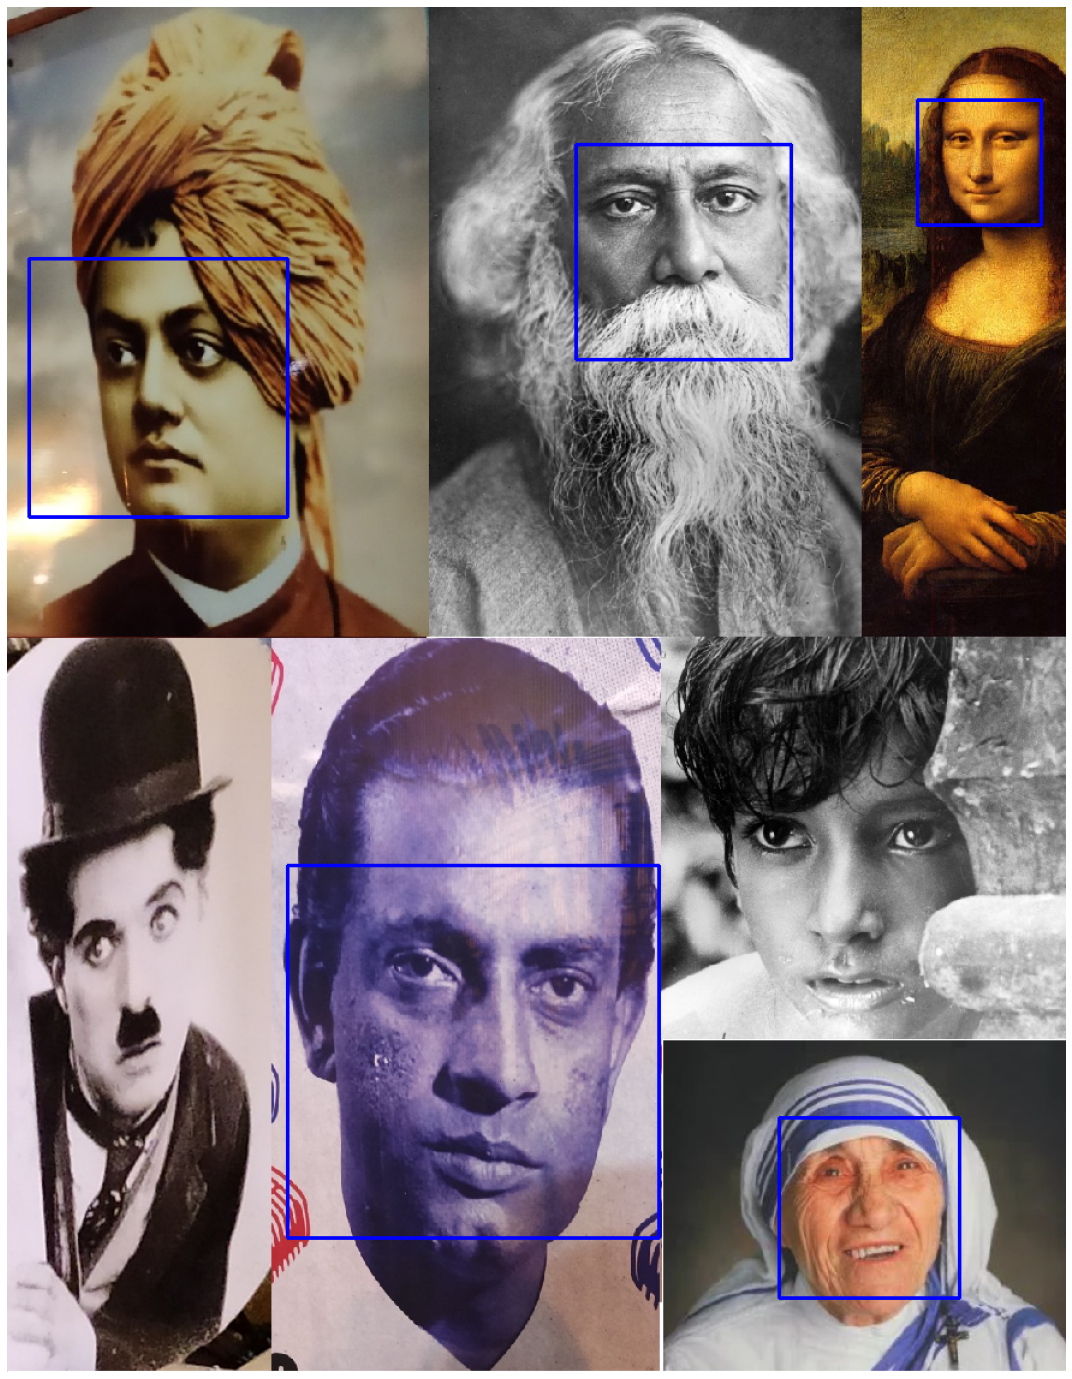

In [25]:
import cv2
import dlib
import matplotlib.pylab as plt

img = cv2.cvtColor(cv2.imread('images/all.png'), cv2.COLOR_BGR2RGB)
hog_detector = dlib.get_frontal_face_detector()
faces = hog_detector(img, 0)
print(len(faces)) # broj detektovanih lica
for face in faces:
    l,t,r,b = face.left(), face.top(), face.right(), face.bottom()
    img = cv2.rectangle(img,(l,t),(r,b),(0,0,255),2)
plt.figure(figsize=(15,20))
plt.imshow(img), plt.axis('off')
plt.tight_layout()
plt.show()

## Korisni linkovi

1.   [Video tracking](https://en.wikipedia.org/wiki/Video_tracking)

2.   [MultiTracker : Multiple Object Tracking using OpenCV (C++/Python)](https://learnopencv.com/multitracker-multiple-object-tracking-using-opencv-c-python/)

3.   [Object Tracking in Video with Discriminative Correlation Filter](https://www.youtube.com/watch?v=GPTlMZQ6f8o&ab_channel=SandipanDey)

4.   [OpenCV Tracking API](https://docs.opencv.org/3.4/d9/df8/group__tracking.html)

5.   [EAST-Detector-for-text-detection-using-OpenCV](https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/)

6.   [EAST: An Efficient and Accurate Scene Text Detector](https://arxiv.org/pdf/1704.03155.pdf), Xinyu Zhou

7.   [SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325), Wei Liu

8.   [Face Detection – OpenCV, Dlib and Deep Learning ( C++ / Python )](https://learnopencv.com/face-detection-opencv-dlib-and-deep-learning-c-python/)

## Reference

1.   [Python Image Processing Cookbook](https://www.amazon.com/Python-Image-Processing-Cookbook-processing-ebook/dp/B084ZN7Y5F), Sandipan Dey




## TO DO

### Zadatak 1

Uraditi detekciju lica na fotografiji *beatles.png*.

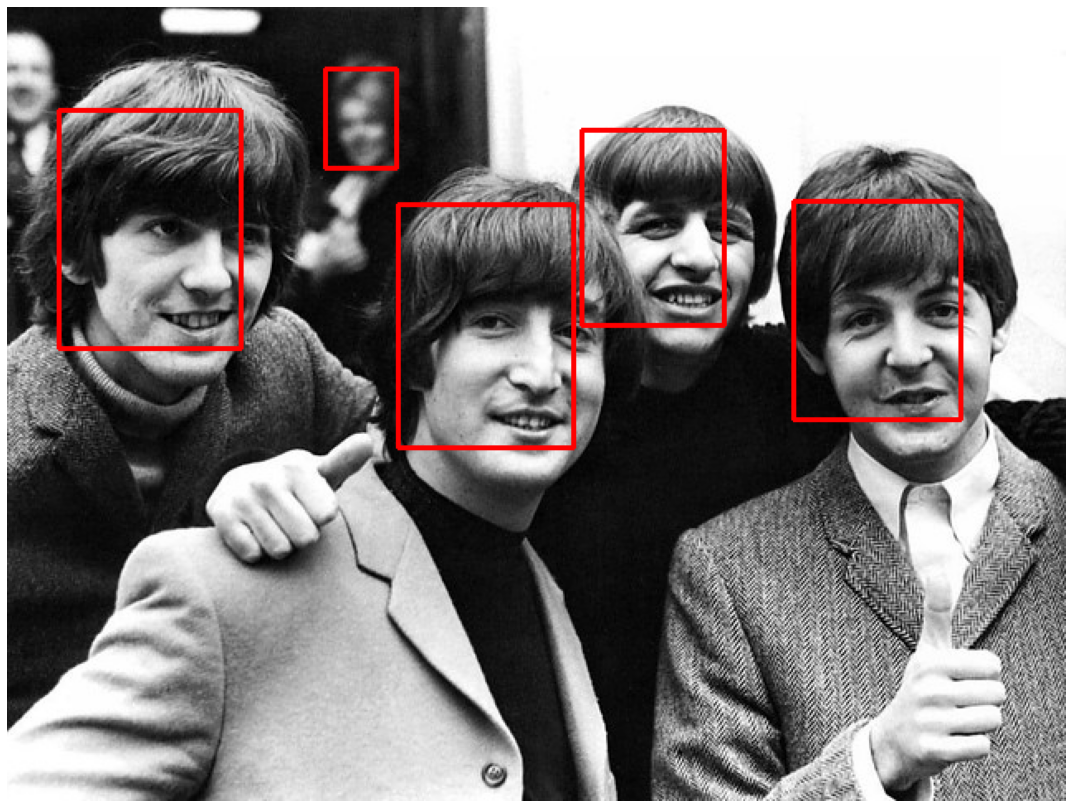